In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib notebook

from perceval.backends.core.git import Git

In [2]:
def git_repo_data(gitURI):
    """Function to get commits data from a git repository
    Args:
        gitURI (str): git repository URI
    Returns:
        paDataframe : Dataframe with git author, commit hash, 
                                repository name, and author commit date
    """
    git_repo = gitURI.split('/')[-1]
    data_repository = Git(uri=gitURI, gitpath='/tmp/{}'.format(git_repo))
    df = pd.DataFrame()

    for commit in data_repository.fetch():
        contributor_git_username = commit['data']['Author']
        contributor_name = contributor_git_username.split('<')[0][:-1]
        contributor_email = contributor_git_username.split('<')[1].split('>')[0]
        contributor_email_domain = contributor_git_username.split('@')[-1][:-1]
        commit_date = parser.parse(commit['data']['AuthorDate'])
        df = df.append({
            'author': commit['data']['Author'],
            'name': contributor_name,
            'email': contributor_email,
            'email_domain': contributor_email_domain,
            'commit': commit['data']['commit'],
            'repository': git_repo,
            'date': commit['data']['AuthorDate'],
            'weekday': commit_date.isoweekday(),
            'hour': commit_date.hour,
        }, ignore_index=True)

    return df

In [3]:
data = git_repo_data('https://github.com/chaoss/grimoirelab-perceval')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
author          1421 non-null object
commit          1421 non-null object
date            1421 non-null object
email           1421 non-null object
email_domain    1421 non-null object
hour            1421 non-null float64
name            1421 non-null object
repository      1421 non-null object
weekday         1421 non-null float64
dtypes: float64(2), object(7)
memory usage: 100.0+ KB


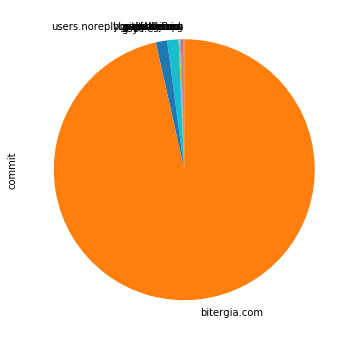

In [4]:
data.groupby(['email_domain'])['commit'].nunique().sort_values().plot.pie(figsize=(6,6),startangle=90)

In [5]:
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index, errors='coerce', utc=True)

/home/jsmanrique/devel/bitergia/grimoirelab-workshop/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


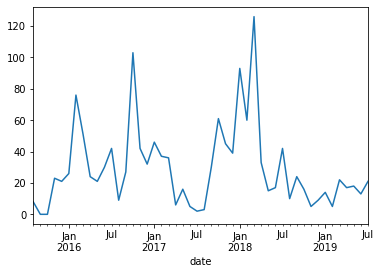

In [6]:
data['2009-01-01':].resample('M').commit.nunique().plot() 

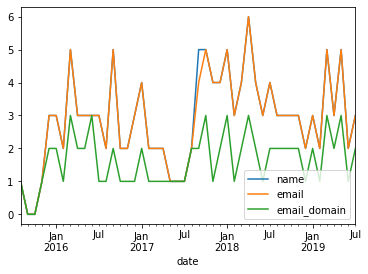

In [8]:
data['2009-01-01':].resample('M')['name','email','email_domain'].nunique().plot() 